<a href="https://colab.research.google.com/github/bharaniabhishek123/ML-Introduction/blob/main/02_Linear_Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

## Linear Regression is an approach that tries to find a linear relationship between a dependent variable and an independent variable by minimizing the distance as shown below.
Linear Regression is a statistical method that allows us to summarize and study relationships between a target variable (also known as dependent variable) on one or more predictors (also known as independent variables).
The objective is to estimate and/or predict the mean value of the dependent variable (continuous) on the basis of the known values of the independent variables. And try to minimize the error as much as possible.

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

## Update the sklearn version to latest one on google colab; 

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0
Uninstalling scikit-learn-1.0:
  Successfully uninstalled scikit-learn-1.0
  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)


# Note: Please restart the runtime : Runtime >> **Restart runtime** and make sure we are on version 1.0 by executing below cell

In [ ]:
import sklearn

sklearn.__version__ 

'1.0'

#1. Dataset 

In this exercise we will use UCI Diabetes Dataset, just to play around with Linear and Logistic regression models.

For each patient we have the body mass index(BMI) and a risk of diabetes (score from 0-300) 

Our goal is to find how BMI affects an individual's diabetes risk.

In [ ]:
from sklearn import datasets 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

import matplotlib.pyplot as plt

import torch 
import torch.nn as nn 


# Load the dataset 
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# using only 1 feature bmi
X = X.loc[:, ['bmi']] 



## Split the dataset into training set and test test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
print(f'x_train.shape={X_train.shape} x_test.shape={X_test.shape} y_train.shape={y_train.shape} y_test.shape={y_test.shape}')

x_train.shape=(294, 1) x_test.shape=(148, 1) y_train.shape=(294,) y_test.shape=(148,)


In [ ]:
# Display points
pd.concat([X_train, y_train], axis=1).head()

,bmi,target
193,-0.005128,116.0
109,-0.009439,81.0
195,0.025051,122.0
145,0.128521,259.0
210,0.014272,191.0


Text(0, 0.5, 'Diabetes Risk')

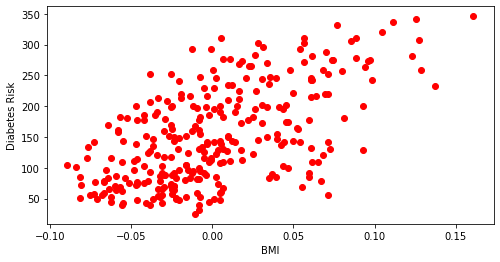

In [ ]:


plt.rcParams['figure.figsize'] = [8,4]


plt.scatter(X_train, y_train, color='red')
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

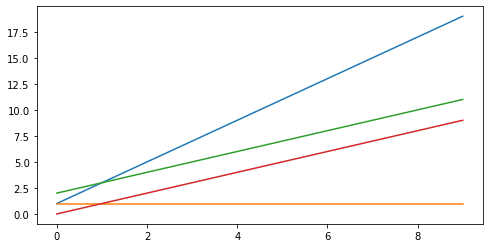

In [ ]:
theta_list = [(1,2),(1,0),(2,1),(0,1)]
for theta0, theta1 in theta_list:
  x = np.arange(10)
  y = theta1 * x + theta0 
  plt.plot(x,y)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


regr = linear_model.LinearRegression()

regr.fit(X_train, y_train.values)

y_pred = regr.predict(X_train)

print("Slope (theta1): {}".format(regr.coef_[0]))
print("Bias (theta0) :{}".format(regr.intercept_))

Slope (theta1): 975.4044466267671
Bias (theta0) :150.18032239829225


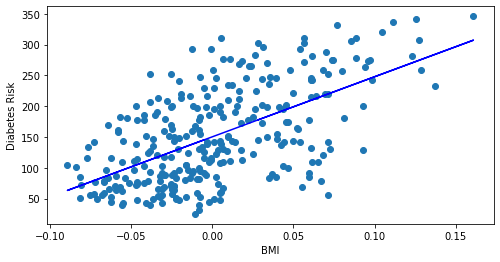

In [ ]:
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

plt.scatter(X_train, y_train)

plt.plot(X_train,y_pred, 'b')
plt.show()

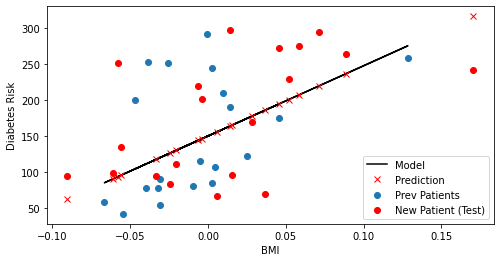

In [ ]:
# Model prediction on Test Set 

y_test_pred = regr.predict(X_test) 

plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

plt.scatter(X_train[:20], y_train[:20])
plt.scatter(X_test[:20], y_test[:20], color='red', marker='o')
plt.plot(X_train[:20], y_pred[:20], color='black') 
plt.plot(X_test[:20], y_test_pred[:20], 'x', color='red')
plt.legend(['Model','Prediction', 'Prev Patients', 'New Patient (Test)' ])

## Logistic Regression

### We can convert the earlier problem into a classification by predicting the value as low diabetes score or high diabetes score 


for e.g. let's say the score is 250 then it is high but it is 120 it is low. Let's choose a threshold of 150.

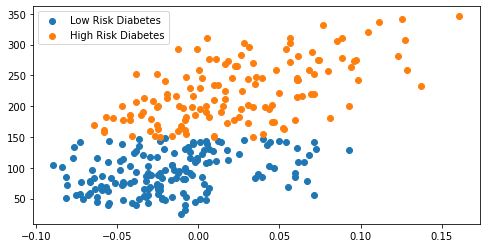

In [ ]:
y_train_discrete = np.digitize(y_train, bins=[150])

# Plot the high/low 
plt.scatter(X_train[y_train_discrete==0], y_train[y_train_discrete==0])
plt.scatter(X_train[y_train_discrete==1], y_train[y_train_discrete==1])
plt.legend(["Low Risk Diabetes", "High Risk Diabetes"])

In [ ]:
clf = linear_model.LogisticRegression()

clf.fit(X_train, y_train_discrete)

y_train_pred_discrete = clf.predict(X_train)